# Pymaceuticals Observations and Insights
* The study data seems sound with an even sampling of mouse gender and number of mice used per study regimen and only one outlier was found.
* When reviewing summary statistics, we see that Ramicane seems to be the most promising regimen, closely followed by Capomulin. Conversely, Ketapril seems to be least effective, closely followed by Naftisol and Stelasyn, all of which were less effective than no treatment (placebo)
* We may want to consider mouse age and metastatic sites for further analysis. While reviewing the last timepoint dataframes, I see that many mice didn't recieve all treatments. Mortality during the course of the study impacts the analysis. It might be interesting to do analysis on only those mice that recieved the entire treatment course.

## Dependencies and Data Cleaning

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
study_data.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [2]:
# Check the number of mice.
mouse_count = len(study_data['Mouse ID'].unique())
mouse_count

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = study_data[study_data.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouse_id.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Get all the data for the duplicate mouse ID. 
dup_mouse_data = study_data[study_data['Mouse ID'].isin(dup_mouse_id['Mouse ID'])==True]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse
clean_data = study_data[study_data['Mouse ID'].isin(dup_mouse_id['Mouse ID'])==False]
clean_data.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [6]:
# Check the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_data['Mouse ID'].unique())
clean_mouse_count

248

## Summary Statistics: Tumor volume for each regimen (mean, median, variance, standard deviation, and SEM)

In [7]:
# Using multiple series and putting them all together at the end.
regimen_group = clean_data.groupby('Drug Regimen')
regimen_mean = regimen_group['Tumor Volume (mm3)'].mean()
regimen_median = regimen_group['Tumor Volume (mm3)'].median()
regimen_var = regimen_group['Tumor Volume (mm3)'].var()
regimen_stdev = regimen_group['Tumor Volume (mm3)'].std()
regimen_sem = regimen_group['Tumor Volume (mm3)'].sem()

regimen_summary = pd.DataFrame({'Mean': regimen_mean, 'Median': regimen_median,
                               'Variance': regimen_var, 'Standard Deviation': regimen_stdev,
                               'SEM': regimen_sem})
regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using a single groupby function
regimen_summary = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
                                    ['mean', 'median', 'var','std','sem'])
regimen_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Charts: Total number of mice for each treatment regimen
* **Note: I wasn't sure whether this should be mice per treatment regimen or timepoints per treatment regimen, but we were instructed to do it this way

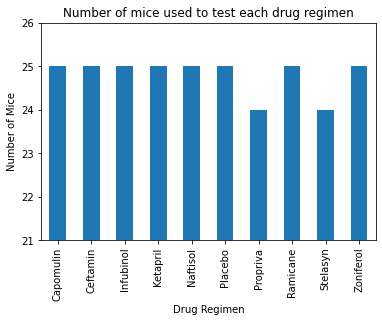

In [9]:
# Using Pandas
remove_dup_mice = clean_data.drop_duplicates(['Mouse ID'])
regimen_group = remove_dup_mice.groupby('Drug Regimen').agg({'Mouse ID': ['count']})
bar = regimen_group.plot(kind='bar', legend=None)
bar.set_title('Number of mice used to test each drug regimen')
bar.set_ylabel('Number of Mice')
bar.set_ylim(21,26)
plt.show()

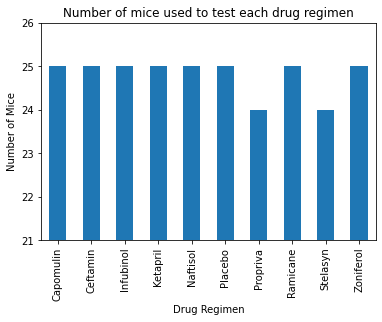

In [10]:
# Using Pyplot
drug_mice = remove_dup_mice['Drug Regimen'].value_counts()
drug_mice = drug_mice.sort_index(ascending = True)

plt.bar(drug_mice.index.values, drug_mice.values, width=.51)
plt.xticks(rotation='vertical')
plt.xlim(-.5, 9.5)
plt.ylim(21,26)
plt.title('Number of mice used to test each drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

## Pie Charts: Distribution of female vs male mice

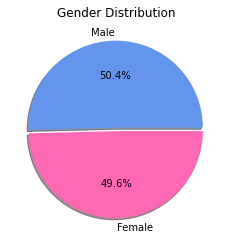

In [11]:
# Using Pandas
sex = remove_dup_mice['Sex'].value_counts()
colors = ['cornflowerblue', 'hotpink']
pie = sex.plot(kind='pie', title = 'Gender Distribution', explode = (.04,0), colors=colors, autopct='%1.1f%%', shadow=True)
pie.set_ylabel('')
plt.show()

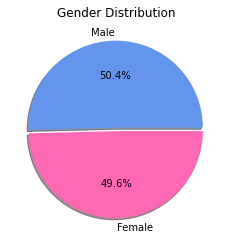

In [12]:
# Using Pyplot
colors = ["cornflowerblue", "hotpink"]
labels = ['Male', 'Female']
plt.pie(sex.values, explode = (.04,0), colors=colors, autopct='%1.1f%%', shadow=True, labels=labels)
plt.title('Gender Distribution')
plt.show()

## Quartiles and Outliers: Final tumor volume of each mouse across four treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)

In [13]:
# Create dataframe containing the final tumor volume for each mouse
clean_data.sort_values(by = (['Mouse ID', 'Timepoint']))
last_timepoint = clean_data.drop_duplicates(['Mouse ID'], keep = 'last')

In [14]:
# Create dataframe filtered on last timepoint for each of the four regimens.
capomulin_last_timepoint_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Capomulin']
ramicane_last_timepoint_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Ramicane']
infubinol_last_timepoint_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Infubinol']
ceftamin_last_timepoint_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Ceftamin']

# Create variables to hold the tumor volume data for each of the regimens
capomulin_volumes = capomulin_last_timepoint_df['Tumor Volume (mm3)']
ramicane_volumes = ramicane_last_timepoint_df['Tumor Volume (mm3)']
infubinol_volumes = infubinol_last_timepoint_df['Tumor Volume (mm3)']
ceftamin_volumes = ceftamin_last_timepoint_df['Tumor Volume (mm3)']

In [15]:
# Create fx to print outlier output.
def print_outliers(drug, outlier):
    if outlier == []:
        print(drug, 'volume outliers: None')
    else:
        outlier = [value for value in outlier]
        print(drug, 'volume outliers:', str(outlier))

#Calculate IQRs, boundaries and outliers for each of the four drug regimens
capomulin = 'Capomulin'
capomulin_quartiles = capomulin_volumes.quantile([.25,.5,.75])
capomulin_iqr = capomulin_quartiles[.75] - capomulin_quartiles[.25]
capomulin_lower = capomulin_quartiles[.25] - (1.5*capomulin_iqr)
capomulin_upper = capomulin_quartiles[.75] + (1.5*capomulin_iqr)
capomulin_outliers = [volume for volume in capomulin_volumes if volume < capomulin_lower or volume > capomulin_upper]
print_outliers(capomulin, capomulin_outliers)  

ramicane = 'Ramicane'
ramicane_quartiles = ramicane_volumes.quantile([.25,.5,.75])
ramicane_iqr = ramicane_quartiles[.75] - ramicane_quartiles[.25]
ramicane_lower = ramicane_quartiles[.25] - (1.5*ramicane_iqr)
ramicane_upper = ramicane_quartiles[.75] + (1.5*ramicane_iqr)
ramicane_outliers = [volume for volume in ramicane_volumes if volume < ramicane_lower or volume > ramicane_upper]
print_outliers(ramicane, ramicane_outliers)  

infubinol = 'Infubinol'
infubinol_quartiles = infubinol_volumes.quantile([.25,.5,.75])
infubinol_iqr = infubinol_quartiles[.75] - infubinol_quartiles[.25]
infubinol_lower = infubinol_quartiles[.25] - (1.5*infubinol_iqr)
infubinol_upper = infubinol_quartiles[.75] + (1.5*infubinol_iqr)
infubinol_outliers = [volume for volume in infubinol_volumes if volume < infubinol_lower or volume > infubinol_upper]
print_outliers(infubinol, infubinol_outliers)     

ceftamin = 'Ceftamin'
ceftamin_quartiles = ceftamin_volumes.quantile([.25,.5,.75])
ceftamin_iqr = ceftamin_quartiles[.75] - ceftamin_quartiles[.25]
ceftamin_lower = ceftamin_quartiles[.25] - (1.5*ceftamin_iqr)
ceftamin_upper = ceftamin_quartiles[.75] + (1.5*ceftamin_iqr)
ceftamin_outliers = [volume for volume in ceftamin_volumes if volume < ceftamin_lower or volume > ceftamin_upper]
print_outliers(ceftamin, ceftamin_outliers)

Capomulin volume outliers: None
Ramicane volume outliers: None
Infubinol volume outliers: [36.321345799999996]
Ceftamin volume outliers: None


## BoxPlot: Final tumor volume of each mouse across the four regimens

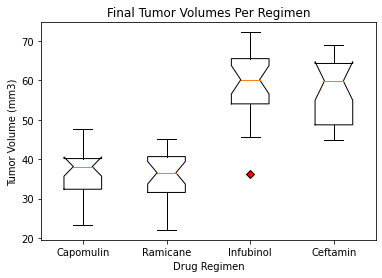

In [16]:
# Define plot variables
good_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_volumes = [capomulin_volumes, ramicane_volumes,
                       infubinol_volumes, ceftamin_volumes]

# Create plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes Per Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
marker = dict(markerfacecolor='r', marker='D')
ax1.boxplot(drug_volumes, labels = good_drugs, notch=True, flierprops=marker)
plt.show()

## Line Plot: Time vs tumor volume for a mouse treated with Capomulin

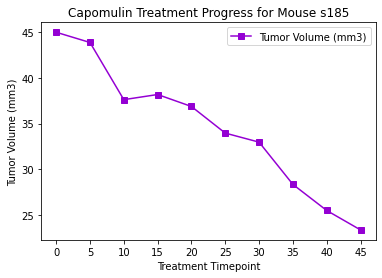

In [17]:
# Find mouse on Capomulin
capomulin_regimen = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin'].reset_index(drop=True)
capomulin_mouse = capomulin_regimen.loc[capomulin_regimen['Mouse ID'] == capomulin_regimen['Mouse ID'][1]]

# Generate line plot
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'],
        marker='s', color='darkviolet', label = 'Tumor Volume (mm3)')
plt.xticks(capomulin_mouse['Timepoint'])
plt.title('Capomulin Treatment Progress for Mouse s185')
plt.xlabel('Treatment Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.show()

## Scatter Plot, Correlation, and Regression: Average tumor volume vs mouse weight for the Capomulin regimen

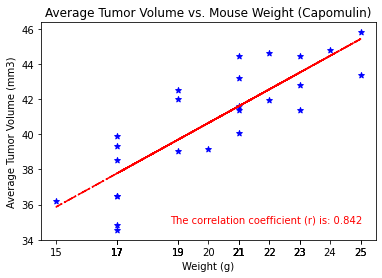

In [18]:
# Get data & define variables
capomulin_group = capomulin_regimen.groupby('Mouse ID')
weight = capomulin_group['Weight (g)'].mean()
avg_volume = capomulin_group['Tumor Volume (mm3)'].mean()

# Generate scatter plot
fig1,ax1 = plt.subplots()
ax1.scatter(weight, avg_volume, marker='*', color = 'b')
ax1.set_title('Average Tumor Volume vs. Mouse Weight (Capomulin)')
ax1.set_xlabel('Weight (g)')
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.set_xticks(weight.values)

# Calculate the correlation coefficient and add linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(weight, avg_volume)
r_value = 'The correlation coefficient (r) is: ' + str(round(rvalue,3))
regress_line = weight * slope + intercept
ax1.annotate(r_value, (18.75,35), color = 'r')
ax1.plot(weight, regress_line, 'r-.')
plt.show()